## Explore restaurants data

### This notebook shows on the nuisances of data processing

In [11]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
# Check if the counts in the input file and data frame are matching
!wc data/restaurants/tripadvisor_in-restaurant_sample.csv

  18802  316159 6912444 data/restaurants/tripadvisor_in-restaurant_sample.csv


In [13]:
pd.read_clipboard

<function pandas.io.clipboard.clipboard.read_clipboard>

In [14]:
df = pd.read_csv("data/restaurants/restaurants-on-tripadvisor.zip",compression='zip',encoding='utf-8')

In [15]:
len(df)

18000

In [16]:
# Check the data types of the columns
df.dtypes

Restaurant ID          object
Restaurant URL         object
Name                   object
Address                object
Phone                  object
City                   object
State                  object
Country                object
Neighbourhood          object
Email ID               object
Menu                  float64
Website                object
Latitude              float64
Longitude             float64
About Restaurant       object
Cuisine                object
Good for(suitable)     object
Price                  object
Currency               object
Rating                 object
Ranking                object
Deal(Promotion)       float64
Total Review          float64
Last Reviewed          object
Recommended           float64
Dining Option          object
Award                  object
Uniq Id                object
dtype: object

In [17]:
# find out what is the percentage of data population in each column
df_col = (len(df)-df.isnull().sum())*100/len(df)
df_col.astype(int).sort_values(ascending=False)

Uniq Id               100
Restaurant ID         100
Country                99
Restaurant URL         99
Name                   99
Address                99
State                  99
Latitude               96
Longitude              96
City                   94
Phone                  86
Total Review           59
Last Reviewed          58
Ranking                56
Website                47
Cuisine                41
Dining Option          12
Price                   9
Currency                9
Good for(suitable)      6
About Restaurant        5
Email ID                4
Neighbourhood           3
Award                   3
Rating                  0
Menu                    0
Recommended             0
Deal(Promotion)         0
dtype: int64

In [18]:
(len(df_isnull().sum())*100/len(df))

NameError: name 'df_isnull' is not defined

In [19]:
df[df["Uniq Id"] == "bfc127bb137c9aa4628c0659e0dce2d5"]

,Restaurant ID,Restaurant URL,Name,Address,Phone,City,State,Country,Neighbourhood,Email ID,...,Currency,Rating,Ranking,Deal(Promotion),Total Review,Last Reviewed,Recommended,Dining Option,Award,Uniq Id
1547,4\r159832,http://www.tripadvisor.in/Restaurant_Review-g6...,Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bfc127bb137c9aa4628c0659e0dce2d5


In [20]:
# select sub set of columns that can be checked for null and remove any such records
major_columns = ['Restaurant ID','Restaurant URL','Name','Uniq Id']
col_na = [col_name for col_name in list(df.columns) if col_name not in major_columns]

In [21]:
print(col_na)

['Address', 'Phone', 'City', 'State', 'Country', 'Neighbourhood', 'Email ID', 'Menu', 'Website', 'Latitude', 'Longitude', 'About Restaurant', 'Cuisine', 'Good for(suitable)', 'Price', 'Currency', 'Rating', 'Ranking', 'Deal(Promotion)', 'Total Review', 'Last Reviewed', 'Recommended', 'Dining Option', 'Award']


In [22]:
# drop all of the rows where subset of columns are completely null
df1 = df.dropna(axis=0,subset=col_na,how='all')

In [23]:
len(df1)

17996

In [24]:
len(df1.columns)

28

In [25]:
# drop those columns that are completely null
df2 = df1.dropna(axis=1,how='all').copy()

In [26]:
len(df2)

17996

In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17996 entries, 0 to 17999
Data columns (total 25 columns):
Restaurant ID         17996 non-null object
Restaurant URL        17990 non-null object
Name                  17990 non-null object
Address               17978 non-null object
Phone                 15566 non-null object
City                  17004 non-null object
State                 17993 non-null object
Country               17996 non-null object
Neighbourhood         650 non-null object
Email ID              858 non-null object
Website               8576 non-null object
Latitude              17442 non-null float64
Longitude             17442 non-null float64
About Restaurant      937 non-null object
Cuisine               7553 non-null object
Good for(suitable)    1199 non-null object
Price                 1704 non-null object
Currency              1701 non-null object
Rating                8 non-null object
Ranking               10133 non-null object
Total Review          10

In [28]:
df2['Total Review'].value_counts()

1.0      2469
2.0      1287
3.0       867
4.0       558
5.0       462
6.0       378
7.0       316
8.0       269
9.0       247
10.0      216
11.0      201
12.0      180
13.0      143
15.0      142
14.0      130
16.0      129
17.0      125
18.0      100
19.0       98
20.0       90
22.0       83
23.0       76
21.0       73
24.0       72
25.0       70
26.0       65
28.0       56
32.0       56
30.0       53
33.0       49
         ... 
405.0       1
367.0       1
613.0       1
502.0       1
381.0       1
436.0       1
327.0       1
324.0       1
345.0       1
369.0       1
535.0       1
549.0       1
137.0       1
391.0       1
203.0       1
285.0       1
380.0       1
210.0       1
817.0       1
224.0       1
320.0       1
272.0       1
153.0       1
238.0       1
901.0       1
314.0       1
455.0       1
378.0       1
195.0       1
263.0       1
Name: Total Review, Length: 327, dtype: int64

In [29]:
len(df2['Total Review'].value_counts())

327

In [30]:
df2['Total Review'].value_counts().iloc[0:21].sum()

8490

In [31]:
df2['Total Review'].value_counts()

1.0      2469
2.0      1287
3.0       867
4.0       558
5.0       462
6.0       378
7.0       316
8.0       269
9.0       247
10.0      216
11.0      201
12.0      180
13.0      143
15.0      142
14.0      130
16.0      129
17.0      125
18.0      100
19.0       98
20.0       90
22.0       83
23.0       76
21.0       73
24.0       72
25.0       70
26.0       65
28.0       56
32.0       56
30.0       53
33.0       49
         ... 
405.0       1
367.0       1
613.0       1
502.0       1
381.0       1
436.0       1
327.0       1
324.0       1
345.0       1
369.0       1
535.0       1
549.0       1
137.0       1
391.0       1
203.0       1
285.0       1
380.0       1
210.0       1
817.0       1
224.0       1
320.0       1
272.0       1
153.0       1
238.0       1
901.0       1
314.0       1
455.0       1
378.0       1
195.0       1
263.0       1
Name: Total Review, Length: 327, dtype: int64

In [32]:
df2['Total Review'].value_counts().iloc[0:21]


1.0     2469
2.0     1287
3.0      867
4.0      558
5.0      462
6.0      378
7.0      316
8.0      269
9.0      247
10.0     216
11.0     201
12.0     180
13.0     143
15.0     142
14.0     130
16.0     129
17.0     125
18.0     100
19.0      98
20.0      90
22.0      83
Name: Total Review, dtype: int64

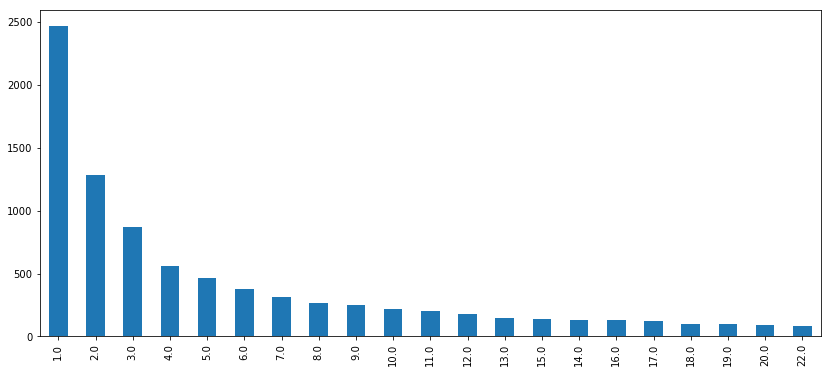

In [33]:
# Top 20 reviews
df2['Total Review'].value_counts().iloc[0:21].plot(kind='bar',figsize=(14,6))

In [34]:
# incase if you want to consider the columns having data populated > 60%
cols = [col for col in list(df.columns) if col not in list(df_col[df_col > 60].index)]

In [35]:
cols

['Neighbourhood',
 'Email ID',
 'Menu',
 'Website',
 'About Restaurant',
 'Cuisine',
 'Good for(suitable)',
 'Price',
 'Currency',
 'Rating',
 'Ranking',
 'Deal(Promotion)',
 'Total Review',
 'Last Reviewed',
 'Recommended',
 'Dining Option',
 'Award']

In [36]:
df1 = df[cols]

In [37]:
df.head(2)

,Restaurant ID,Restaurant URL,Name,Address,Phone,City,State,Country,Neighbourhood,Email ID,...,Currency,Rating,Ranking,Deal(Promotion),Total Review,Last Reviewed,Recommended,Dining Option,Award,Uniq Id
0,1345154,http://www.tripadvisor.in/Restaurant_Review-g1...,Gaststatte Gunter Jung,"Hintergasse 38, 61231 Bad Nauheim, Hesse, Germany",+49 6032 81796,Bad Nauheim,Hesse,Germany,NaN,NaN,...,NaN,NaN,40 of 61,NaN,1.0,- 28 May 2012,NaN,NaN,NaN,030c4d068d2d59518db5de6ebb9ecdd6
1,5818482,http://www.tripadvisor.in/Restaurant_Review-g1...,TurQuaz Shisha Lounge & Thorizzio da Bambi Lie...,"Frankfurter Strasse 49, 63571 Gelnhausen, Hess...",06051 8877462,Gelnhausen,Hesse,Germany,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6e160a28f7d9beeee848a35bd947477c


In [38]:
df['Ranking'].head()

0    40 of 61
1         NaN
2    24 of 53
3         NaN
4     1 of 24
Name: Ranking, dtype: object

In [39]:
df.Country.value_counts()

United States    12851
Germany           2549
Brazil            1661
England            431
Scotland           356
Canada              68
France              44
Switzerland         29
Wales                2
Africa               1
Mexico               1
South America        1
Europe               1
Austria              1
Name: Country, dtype: int64

In [40]:
df[df.Country=="United States"]["State"].value_counts()

FL              3132
CA              2985
AL              1509
WA              1295
MA              1291
MI               936
MN               429
AR               282
RI               248
SD               235
CO               224
ME                74
MS                36
IA                27
OR                25
GA                22
ND                15
ID                13
NH                10
TN                 9
WI                 8
NE                 7
NV                 7
MO                 6
OH                 5
CT                 4
TX                 3
OK                 2
LA                 1
Woburn             1
Gainesville        1
White Salmon       1
Mitchell           1
Lutsen             1
Birmingham         1
Harrison           1
Sacramento         1
Platte             1
Name: State, dtype: int64

In [41]:
df_usa = df[df.Country=="United States"]

In [42]:
# Select only those records with valid state codes, STATE code that has lenght of 2
df_usa_state = df_usa[df_usa.State.str.len() == 2]

In [43]:
df_usa_state.State.value_counts()

FL    3132
CA    2985
AL    1509
WA    1295
MA    1291
MI     936
MN     429
AR     282
RI     248
SD     235
CO     224
ME      74
MS      36
IA      27
OR      25
GA      22
ND      15
ID      13
NH      10
TN       9
WI       8
NE       7
NV       7
MO       6
OH       5
CT       4
TX       3
OK       2
LA       1
Name: State, dtype: int64

In [44]:
df_usa_state.State.value_counts()[0:10]

FL    3132
CA    2985
AL    1509
WA    1295
MA    1291
MI     936
MN     429
AR     282
RI     248
SD     235
Name: State, dtype: int64

In [45]:
pd.to_datetime(df2["Last Reviewed"].head(10))

0   2012-05-28
1          NaT
2   2008-02-06
3          NaT
4   2014-03-11
5          NaT
6   2014-04-20
7   2014-06-09
8   2014-06-01
9          NaT
Name: Last Reviewed, dtype: datetime64[ns]

In [46]:
# Last Reviewed column contains data values in the format dd Mon Year
df2["Last Reviewed"].head(10)

0    - 28 May 2012
1              NaN
2     - 6 Feb 2008
3              NaN
4    11 March 2014
5              NaN
6    - 20 Apr 2014
7      9 June 2014
8     - 1 Jun 2014
9              NaN
Name: Last Reviewed, dtype: object

In [47]:
# This function extract the day, month, year part of the date column
def get_split_value(value,index):
    value = str(value)
    value = value.replace("- ","")
    fields = value.split()
    month = ""
    try:
        month = fields[index]
    except TypeError:
        month = ""
    except IndexError:
        month = ""
    return month

In [48]:
# Let's check if the date values in Last Reviewed column are having valid values
# check Day
days = df2["Last Reviewed"].apply(lambda x:get_split_value(x,0)).value_counts().sort_index(ascending=True)
print(sorted([ int(x) for x in list(days.index) if x != 'nan']))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


In [49]:
# check Month
months = df2["Last Reviewed"].apply(lambda x:get_split_value(x,1)).value_counts().sort_index(ascending=True)
print(sorted(list(months.index)))

['', 'Apr', 'April', 'Aug', 'August', 'Dec', 'December', 'Feb', 'February', 'Jan', 'January', 'Jul', 'July', 'Jun', 'June', 'Mar', 'March', 'May', 'Nov', 'November', 'Oct', 'October', 'Sep', 'September']


In [50]:
# check Year
years = df2["Last Reviewed"].apply(lambda x:get_split_value(x,2)).value_counts().sort_index(ascending=True)
print(list(years.index))

['', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014']


In [54]:
df2["Last Reviewed"].apply(lambda x:get_split_value(x,2)).value_counts()##MAX REVIEWS IN ALL YEARS

        7502
2014    6738
2013    2712
2012     666
2011     175
2008      70
2010      64
2009      39
2007      21
2005       4
2004       3
2006       2
Name: Last Reviewed, dtype: int64

In [55]:
df_usa["Last Reviewed"].apply(lambda x:get_split_value(x,2)).value_counts()

        5139
2014    4890
2013    2126
2012     462
2011      78
2008      64
2009      34
2010      29
2007      20
2005       4
2004       3
2006       2
Name: Last Reviewed, dtype: int64

In [56]:
df2['last_reviewed_dt'] = pd.to_datetime(df2["Last Reviewed"])

In [57]:
df2.last_reviewed_dt.head()

0   2012-05-28
1          NaT
2   2008-02-06
3          NaT
4   2014-03-11
Name: last_reviewed_dt, dtype: datetime64[ns]

In [58]:
df2.last_reviewed_dt.describe()

count                   10494
unique                   1157
top       2014-05-28 00:00:00
freq                      290
first     2004-07-05 00:00:00
last      2014-07-23 00:00:00
Name: last_reviewed_dt, dtype: object

In [62]:
df2[df2.Country=="United States"].last_reviewed_dt.apply(lambda x:x.year).value_counts()#MAX REVIEWS IN USA

2014.0    4890
2013.0    2126
2012.0     462
2011.0      78
2008.0      64
2009.0      34
2010.0      29
2007.0      20
2005.0       4
2004.0       3
2006.0       2
Name: last_reviewed_dt, dtype: int64